In [1]:
!pip install cartopy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 12.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:

data_path = '/content/drive/My Drive/Manitoba_assignment/chirps-v2_monthly_africa_2.5.nc'

In [4]:


data = xr.open_dataset(data_path)
precip = data['precip']

precip_df = precip.to_dataframe().reset_index()

precip_df.head()

,time,latitude,longitude,precip
0,1981-01-01,-39.874996,-19.875004,NaN
1,1981-01-01,-39.874996,-19.625004,NaN
2,1981-01-01,-39.874996,-19.375004,NaN
3,1981-01-01,-39.874996,-19.125004,NaN
4,1981-01-01,-39.874996,-18.875004,NaN


In [5]:

cleaned_precip_df = precip_df.dropna()


cleaned_precip_df.groupby(['latitude','longitude'])['precip'].mean()
cleaned_precip_df[cleaned_precip_df['time']=='1981-01-01'].index



Index([ 6158,  6159,  6160,  6457,  6458,  6459,  6460,  6461,  6753,  6755,
       ...
       95975, 95976, 95977, 95992, 95993, 95995, 95996, 95997, 95998, 95999],
      dtype='int64', length=50069)

In [6]:

def calculate_spi(precip_series, scale=12):
    #aggregated_precip = precip_series.rolling(window=scale).sum()
    log_precip = np.log1p(precip_series)
    mean_log_precip = np.mean(log_precip)
    std_log_precip = np.std(log_precip)
    spi = (log_precip - mean_log_precip) / std_log_precip
    return spi

In [7]:

period_1_start = '1980-01-01'
period_1_end = '2000-12-31'
period_2_start = '2000-01-01'
period_2_end = '2020-12-31'


period_1_df = cleaned_precip_df[(cleaned_precip_df['time'] >= period_1_start) & (cleaned_precip_df['time'] <= period_1_end)]

period_2_df = cleaned_precip_df[(cleaned_precip_df['time'] >= period_2_start) & (cleaned_precip_df['time'] <= period_2_end)]


period_1_df['spi_1980_2000'] = period_1_df.groupby(['latitude', 'longitude'])['precip'].transform(calculate_spi)

period_2_df['spi_2000_2020'] = period_2_df.groupby(['latitude', 'longitude'])['precip'].transform(calculate_spi)

print(period_1_df[period_1_df['time']=='1981-02-01'])
print(period_2_df.head())
net_spi_df1  = period_2_df.groupby(['latitude','longitude'])['spi_2000_2020'].mean() - period_1_df.groupby(['latitude','longitude'])['spi_1980_2000'].mean()
net_spi_df1

<ipython-input-7-b07d56c11c30>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_1_df['spi_1980_2000'] = period_1_df.groupby(['latitude', 'longitude'])['precip'].transform(calculate_spi)
<ipython-input-7-b07d56c11c30>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_2_df['spi_2000_2020'] = period_2_df.groupby(['latitude', 'longitude'])['precip'].transform(calculate_spi)


             time   latitude  longitude     precip  spi_1980_2000
102158 1981-02-01 -34.875000  19.624996  34.663773      -0.036095
102159 1981-02-01 -34.875000  19.874996  32.268169      -0.140794
102160 1981-02-01 -34.875000  20.124996  29.100348      -0.139453
102457 1981-02-01 -34.625000  19.374996  33.513836      -0.125714
102458 1981-02-01 -34.625000  19.624996  34.271236      -0.063110
...           ...        ...        ...        ...            ...
191995 1981-02-01  39.874992  53.875000  32.758495       1.187367
191996 1981-02-01  39.874992  54.125000  32.354916       1.492992
191997 1981-02-01  39.874992  54.375000  37.184166       1.613339
191998 1981-02-01  39.874992  54.625000  39.466309       1.554950
191999 1981-02-01  39.874992  54.875000  36.503990       1.417106

[50069 rows x 5 columns]
               time  latitude  longitude     precip  spi_2000_2020
21894158 2000-01-01   -34.875  19.624996  34.399017      -0.077532
21894159 2000-01-01   -34.875  19.874996  35.268

latitude    longitude
-34.875000  19.624996    3.401249e-08
            19.874996    1.421287e-07
            20.124996   -1.191738e-07
-34.625000  19.374996   -1.213380e-08
            19.624996    2.680790e-07
                             ...     
 39.874992  53.875000    9.871428e-08
            54.125000   -5.487412e-08
            54.375000    4.771107e-08
            54.625000    4.755954e-08
            54.875000    1.165365e-07
Length: 50069, dtype: float32

In [8]:
net_spi_df1.to_csv('/content/drive/My Drive/Manitoba_assignment/net_spi.csv')

In [9]:
mean_spi_1980_2000=period_1_df.groupby(['time','latitude','longitude'])['spi_1980_2000'].mean().reset_index()
mean_spi_2000_2020 = period_2_df.groupby(['time','latitude','longitude'])['spi_2000_2020'].mean().reset_index()

In [10]:
import pandas as pd
merged_spi = pd.merge(mean_spi_1980_2000, mean_spi_2000_2020, on=['time','latitude', 'longitude'])


In [11]:
merged_spi['spi_difference'] = merged_spi['spi_2000_2020'] - merged_spi['spi_1980_2000']
merged_spi


,time,latitude,longitude,spi_1980_2000,spi_2000_2020,spi_difference
0,2000-01-01,-34.875000,19.624996,-0.048502,-0.077532,-0.029030
1,2000-01-01,-34.875000,19.874996,-0.002359,-0.002067,0.000292
2,2000-01-01,-34.875000,20.124996,0.033516,0.024216,-0.009300
3,2000-01-01,-34.625000,19.374996,-0.125510,-0.193722,-0.068211
4,2000-01-01,-34.625000,19.624996,-0.191209,-0.203958,-0.012749
...,...,...,...,...,...,...
600823,2000-12-01,39.874992,53.875000,0.640231,0.560284,-0.079947
600824,2000-12-01,39.874992,54.125000,0.698659,0.568512,-0.130147
600825,2000-12-01,39.874992,54.375000,0.837242,0.652059,-0.185184
600826,2000-12-01,39.874992,54.625000,0.964136,0.761413,-0.202723


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


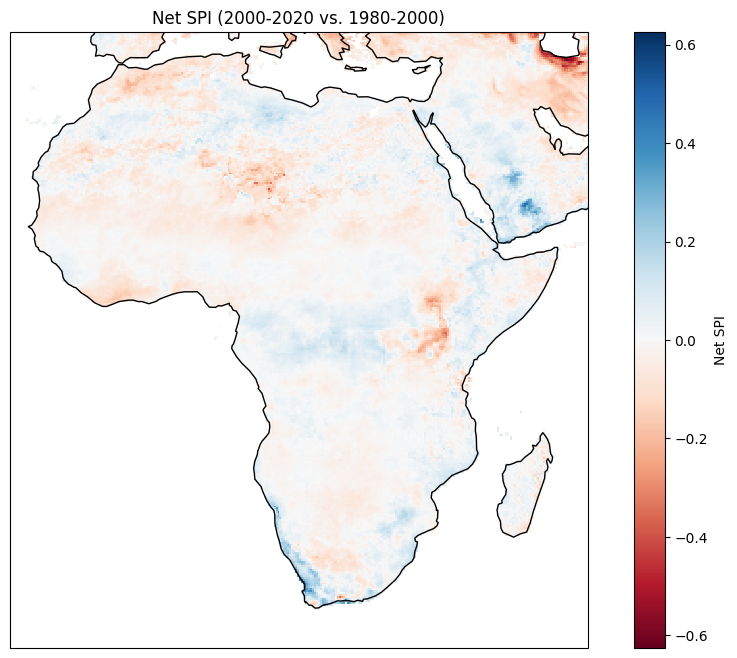

In [12]:

net_spi_xr = merged_spi.set_index(['time', 'latitude', 'longitude']).to_xarray()


plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
net_spi_xr['spi_difference'].mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu', cbar_kwargs={'label': 'Net SPI'})
ax.coastlines()
ax.set_extent([-20, 55, -40, 40], crs=ccrs.PlateCarree())
ax.set_title('Net SPI (2000-2020 vs. 1980-2000)')
plt.show()